In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from sklearn import metrics
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Таблица3(Электронно-микрозондовый анализ формовочных масс).tsv', sep='\t')
df = df.replace(regex=r',', value='.')
del df['Номер_образца']
df["target"] = df["Территория"] + " - " + df["Тип_керамики"]
del df['Территория']
del df['Тип_керамики']
res = df.groupby('target').count()
print(res)

                          K  Ca  SiO2  Na  K.1  Ca.1  Mg  Ti  Fe
target                                                          
Г._Вакканай - Охотский   10  10    10  10   10    10  10  10  10
Г._Вакканай - Сусуйский  11  11    11  11   11    11  11  11  11
Г._Есаши - Охотский       6   6     6   6    6     6   6   6   6
О-в_Ребун - Охотский     16  16    16  16   16    16  16  16  16
О-в_Ребун - Сусуйский     2   2     2   2    2     2   2   2   2
О-в_Рисири - Охотский    12  12    12  12   12    12  12  12  12
О-в_Рисири - Сусуйский    7   7     7   7    7     7   7   7   7
О-в_Сахалин - Охотский   12  12    12  12   12    12  12  12  12
О-в_Сахалин - Сусуйский   3   3     3   3    3     3   3   3   3


In [ ]:
df = df.append(df.loc[df.target == 'Г._Есаши - Охотский'])
df = df.append(df.loc[df.target == 'О-в_Рисири - Сусуйский'])
df = df.append(df.loc[df.target == 'О-в_Сахалин - Сусуйский'])
df = df.append(df.loc[df.target == 'О-в_Сахалин - Сусуйский'])
df = df.append(df.loc[df.target == 'О-в_Ребун - Сусуйский'])
df = df.append(df.loc[df.target == 'О-в_Ребун - Сусуйский'])
df = df.append(df.loc[df.target == 'О-в_Ребун - Сусуйский'])
res = df.groupby('target').count()
print(res)

                          K  Ca  SiO2  Na  K.1  Ca.1  Mg  Ti  Fe
target                                                          
Г._Вакканай - Охотский   10  10    10  10   10    10  10  10  10
Г._Вакканай - Сусуйский  11  11    11  11   11    11  11  11  11
Г._Есаши - Охотский      12  12    12  12   12    12  12  12  12
О-в_Ребун - Охотский     16  16    16  16   16    16  16  16  16
О-в_Ребун - Сусуйский    16  16    16  16   16    16  16  16  16
О-в_Рисири - Охотский    12  12    12  12   12    12  12  12  12
О-в_Рисири - Сусуйский   14  14    14  14   14    14  14  14  14
О-в_Сахалин - Охотский   12  12    12  12   12    12  12  12  12
О-в_Сахалин - Сусуйский  12  12    12  12   12    12  12  12  12


In [ ]:
del df['Ca.1']
del df['K.1']
y = df['target']
X = df.drop(['target'], axis =1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021, test_size=0.2, stratify=y)

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=2021,
                               max_depth=7,
                               criterion='entropy', 
                               min_samples_split=5,
                               min_samples_leaf=3,
                              )
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=5, random_state=2021)

In [ ]:
print(model.score(X_train, y_train))

0.8369565217391305


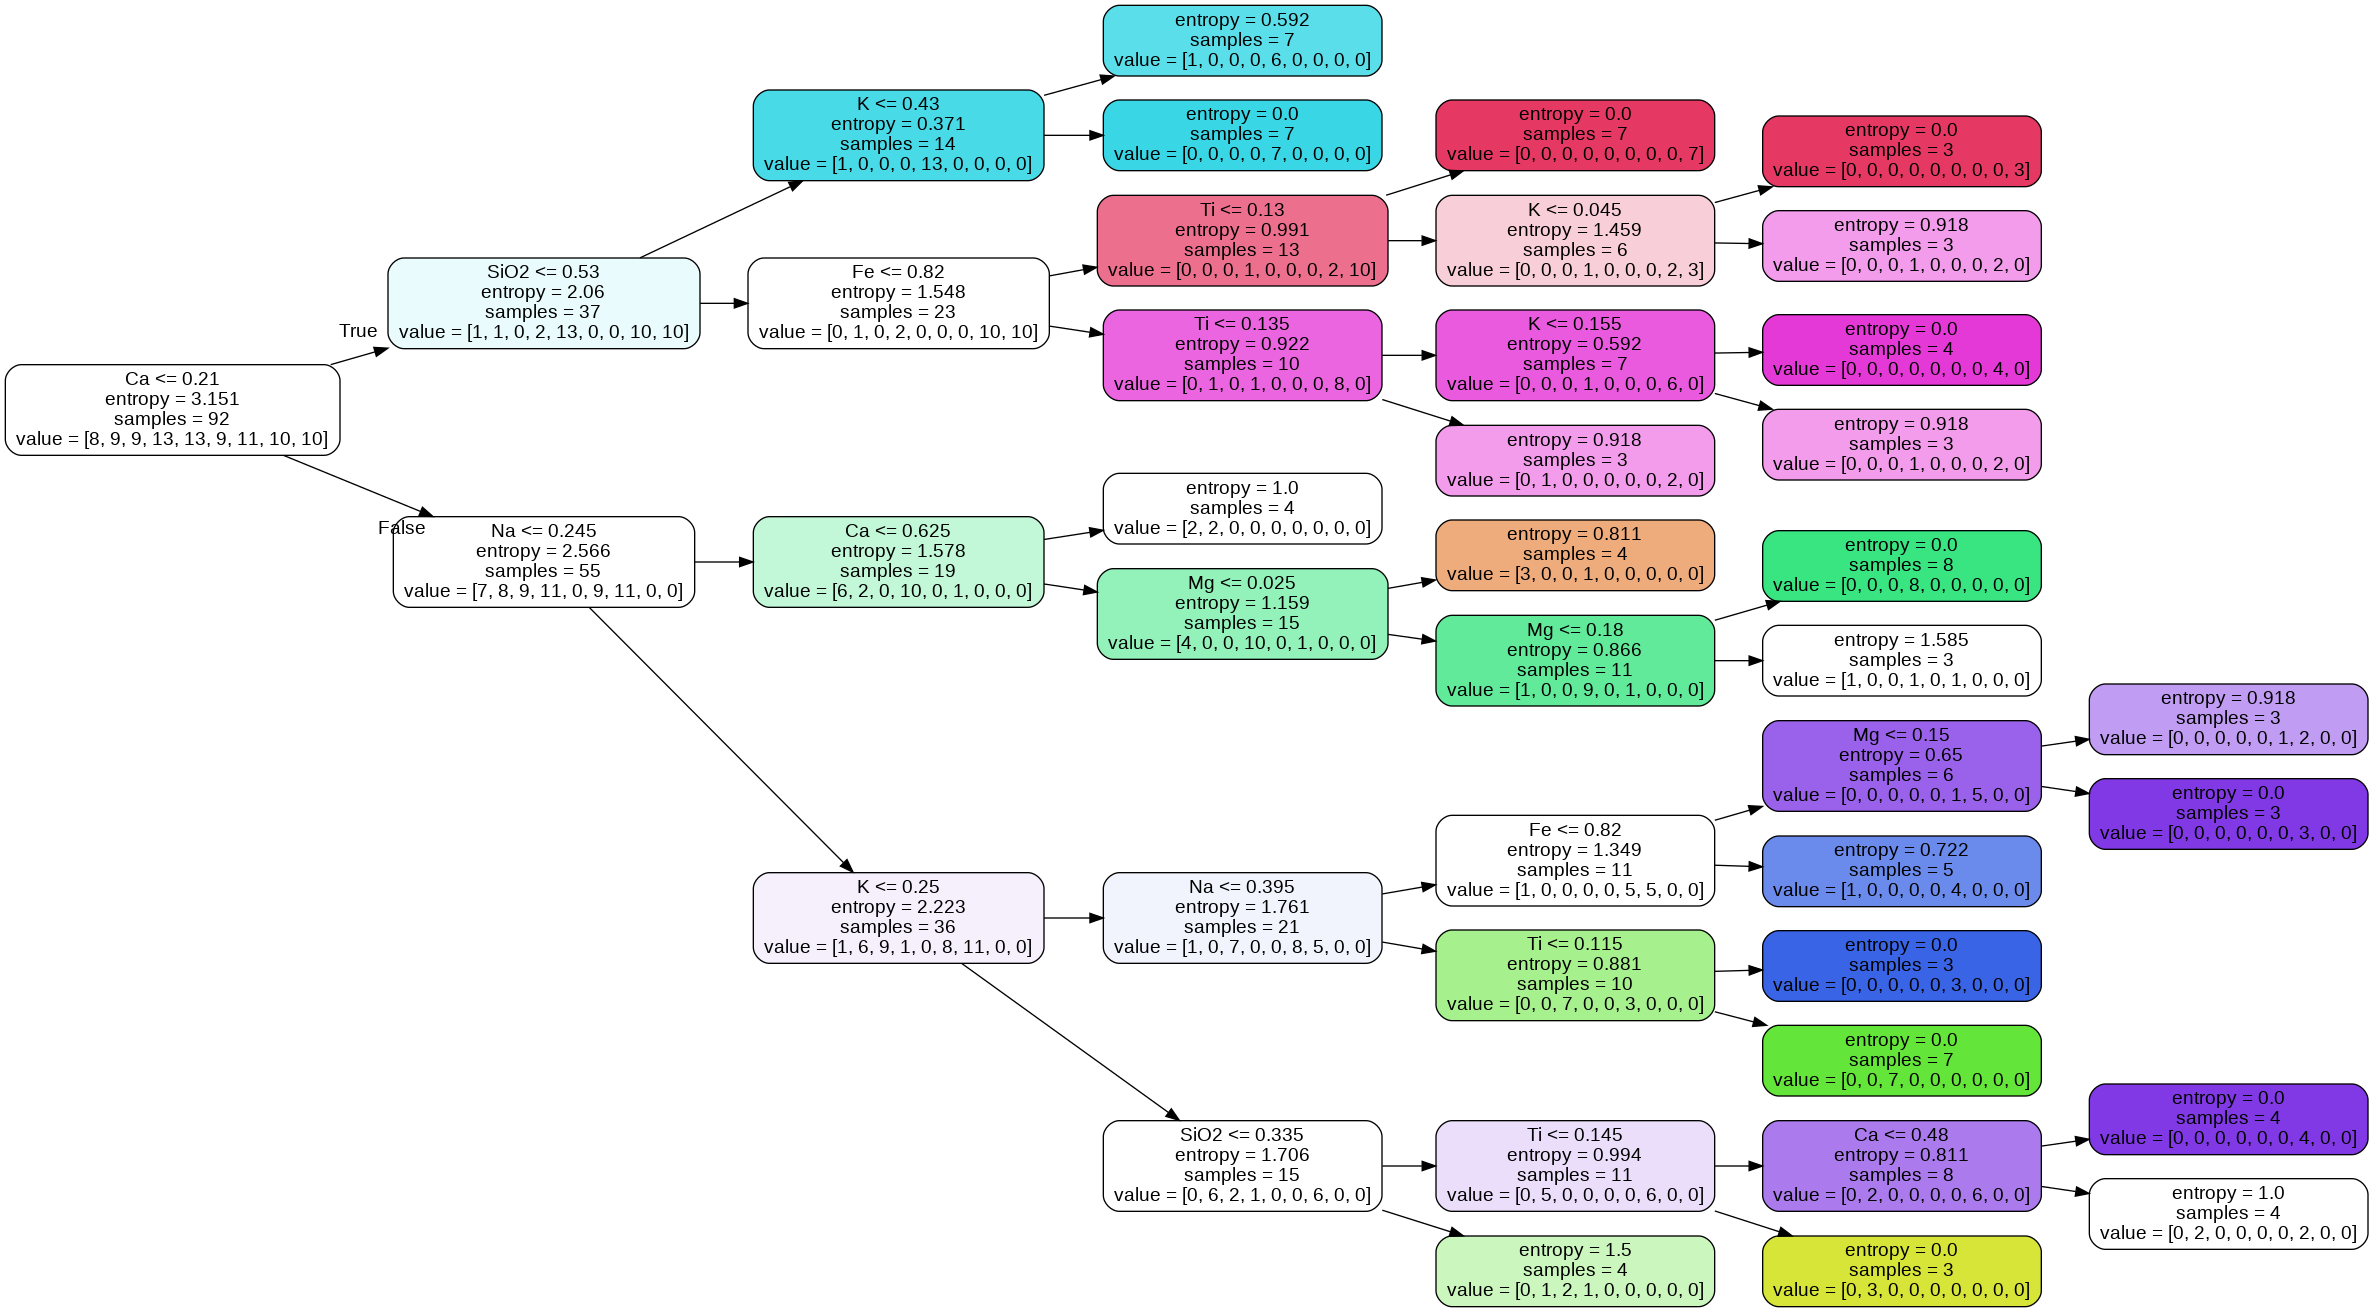

In [ ]:
import graphviz
from IPython.display import Image
from subprocess import call
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data)
 
tree.export_graphviz(model, out_file='tree.dot', 
                      feature_names= X.columns, 
                      rotate=True, label='all',
                      filled=True, 
                      rounded=True,
           #           impurity=True,
           #           node_ids=True,
           #           proportion=True,
                      #special_characters=True
                     )

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png']);
Image("tree.png")

In [ ]:
pd.DataFrame({'feature': X.columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
1,Ca,0.335606
3,Na,0.178564
2,SiO2,0.176850
0,K,0.103994
6,Fe,0.083589
5,Ti,0.079128
4,Mg,0.042269


In [ ]:
y_pred = model.predict(X_test)
print (metrics.classification_report(y_pred, y_test))

                         precision    recall  f1-score   support

 Г._Вакканай - Охотский       0.00      0.00      0.00         0
Г._Вакканай - Сусуйский       0.00      0.00      0.00         0
    Г._Есаши - Охотский       1.00      1.00      1.00         3
   О-в_Ребун - Охотский       0.67      0.67      0.67         3
  О-в_Ребун - Сусуйский       1.00      0.60      0.75         5
  О-в_Рисири - Охотский       0.67      1.00      0.80         2
 О-в_Рисири - Сусуйский       1.00      0.60      0.75         5
 О-в_Сахалин - Охотский       1.00      0.67      0.80         3
О-в_Сахалин - Сусуйский       1.00      1.00      1.00         2

               accuracy                           0.74        23
              macro avg       0.70      0.61      0.64        23
           weighted avg       0.93      0.74      0.80        23



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
